# Import Required Libraries
Import the necessary libraries, including NumPy, pandas, and matplotlib.

In [39]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load EEG Data
Load the EEG data from the CSV file using pandas.

In [40]:
# Load the EEG data from the CSV file using pandas
file_path = '../data/mindMonitor_2025-02-15--19-18-29.csv'
eeg_data = pd.read_csv(file_path)

# Display the first few rows of the data
eeg_data.head()

,TimeStamp,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,...,Gyro_X,Gyro_Y,Gyro_Z,HeadBandOn,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10,Battery,Elements
0,2025-02-15 19:18:29.097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/event/connected Muse-0167
1,2025-02-15 19:18:29.257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/blink
2,2025-02-15 19:18:29.261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/blink
3,2025-02-15 19:18:29.597,0.0,0.285171,0.135338,0.0,0.0,0.011946,0.148115,0.0,0.0,...,0.575714,-2.183228,-0.194397,1.0,2.0,1.0,1.0,4.0,50.0,NaN
4,2025-02-15 19:18:30.098,0.0,0.247423,0.417576,0.0,0.0,-0.103462,0.144801,0.0,0.0,...,0.328979,-2.272949,-0.216827,1.0,4.0,1.0,1.0,4.0,50.0,NaN


# Preprocess Data
Clean and preprocess the EEG data, including handling missing values and selecting relevant columns.

In [41]:
# Convert 'TimeStamp' to datetime
eeg_data['TimeStamp'] = pd.to_datetime(eeg_data['TimeStamp'])

# Fill missing values
eeg_data.fillna(method='ffill', inplace=True)
print("\nEEG Data After Preprocessing:")
print(eeg_data.head())

# Select relevant columns for Alpha waves
alpha_columns = ['Alpha_AF7', 'Alpha_AF8']

# Extract Alpha wave data
alpha_data = eeg_data[alpha_columns]
print("\nAlpha Wave Data:")
print(alpha_data.head())

# Convert the data to numeric type
alpha_data_numeric = alpha_data.apply(pd.to_numeric, errors='coerce')
print("\nAlpha Wave Data (Numeric):")
print(alpha_data_numeric.head())

# Check for any remaining NaN values and handle them
print("\nChecking for NaN values:")
print(alpha_data_numeric.isna().sum())

# Fill any remaining NaN values with the mean of the column
alpha_data_numeric.fillna(alpha_data_numeric.mean(), inplace=True)
print("\nAlpha Wave Data (Numeric) After Filling NaNs:")
print(alpha_data_numeric.head())




EEG Data After Preprocessing:
                TimeStamp  Delta_TP9  Delta_AF7  Delta_AF8  Delta_TP10  \
0 2025-02-15 19:18:29.097        NaN        NaN        NaN         NaN   
1 2025-02-15 19:18:29.257        NaN        NaN        NaN         NaN   
2 2025-02-15 19:18:29.261        NaN        NaN        NaN         NaN   
3 2025-02-15 19:18:29.597        0.0   0.285171   0.135338         0.0   
4 2025-02-15 19:18:30.098        0.0   0.247423   0.417576         0.0   

   Theta_TP9  Theta_AF7  Theta_AF8  Theta_TP10  Alpha_TP9  ...    Gyro_X  \
0        NaN        NaN        NaN         NaN        NaN  ...       NaN   
1        NaN        NaN        NaN         NaN        NaN  ...       NaN   
2        NaN        NaN        NaN         NaN        NaN  ...       NaN   
3        0.0   0.011946   0.148115         0.0        0.0  ...  0.575714   
4        0.0  -0.103462   0.144801         0.0        0.0  ...  0.328979   

     Gyro_Y    Gyro_Z  HeadBandOn  HSI_TP9  HSI_AF7  HSI_AF8  HSI_T

/tmp/ipykernel_3263454/1920047010.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  eeg_data.fillna(method='ffill', inplace=True)


# Perform FAA
To calculate Frontal Alpha Asymmetry (FAA), we use the formula FAA = log(Alpha_AF8) - log(Alpha_AF7). This involves taking the natural logarithm of the Alpha_AF8 and Alpha_AF7 columns and then subtracting the log values of Alpha_AF7 from Alpha_AF8. The resulting FAA values are then plotted over time to visualize the changes.


FAA Data:
0    0.003249
1    0.003249
2    0.003249
3    1.280872
4    1.463972
Name: FAA, dtype: float64


/mnt/nvme/workspace/playground/eeg/venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


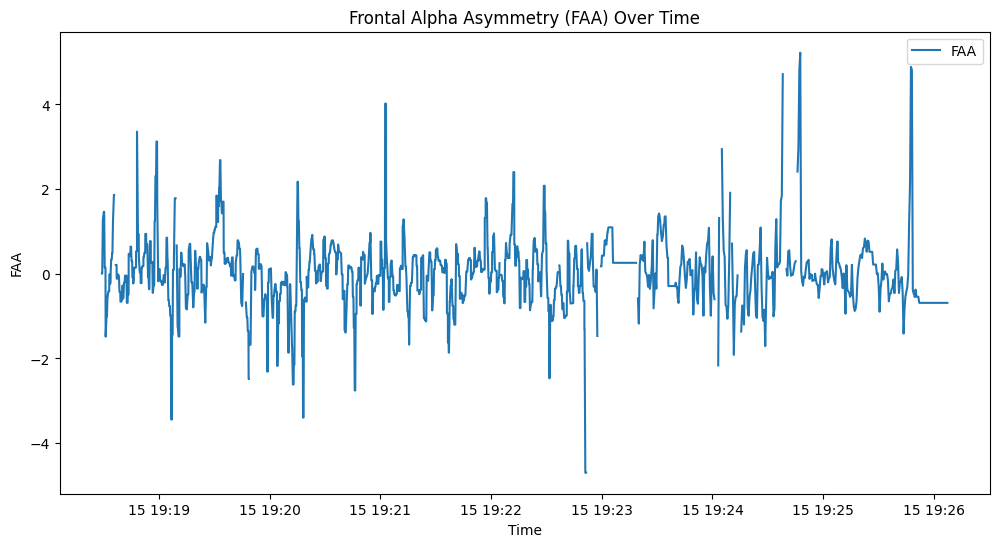

In [42]:


# Calculate Frontal Alpha Asymmetry (FAA)
# FAA = log(Alpha_AF8) - log(Alpha_AF7)
alpha_data_numeric['FAA'] = np.log(alpha_data_numeric['Alpha_AF8']) - np.log(alpha_data_numeric['Alpha_AF7'])
print("\nFAA Data:")
print(alpha_data_numeric['FAA'].head())

# Plot FAA over time
plt.figure(figsize=(12, 6))
plt.plot(eeg_data['TimeStamp'], alpha_data_numeric['FAA'], label='FAA')
plt.title('Frontal Alpha Asymmetry (FAA) Over Time')
plt.xlabel('Time')
plt.ylabel('FAA')
plt.legend()
plt.show()
